# 自然语言处理

## 1.神经网络复习

### 1.1 简单神经网络

In [ ]:
import numpy as np
W1 = np.random.randn(2, 4) # 权重 2x4
b1 = np.random.randn(4)    # 偏置 1x4
x = np.random.randn(10, 2) # 输入 10x2
# h = np.dot(x, W1) + b1
h = x @ W1 + b1 # 加偏置的时候自动将b1广播成10x4
print(W1,b1,x,h,sep='\n\n')

### 1.2 sigmoid函数

In [ ]:
def Sigmoid(x):
# 输入是标量、向量、矩阵，输出值介于0-1之间，对每个元素逐元素独立计算
    return 1 / (1 + np.exp(-x))

print(Sigmoid(0))

### 1.3 变换神经元

In [ ]:
a = sigmoid(h)
print(a) # 10x4
W2 = np.random.randn(4, 3) # 4x3
b2 = np.random.randn(3) # 1x3

s = a @ W2 + b2 # 10x4 @ 4x3 + 1x3
print() 
print(s)

### 1.4 层的类化以及正向传播

In [ ]:
import numpy as np

class sigmoid():
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))

# sigmoid 函数被实现为一个类，主变换处理被实现为forward(x)方法
# 因为Sigmoid层没有需要学习的参数，所以使用空列表初始化实例变量params


# 全连接层Affine层的实现
class Affine():
    def __init__(self, W, b):
        self.params = [W,b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out


In [ ]:
class TwoLayerNet():
    def __init__(self, input_size, hidden_size, output_size):
        I,H,O = input_size, hidden_size, output_size

        # 初始化权重和偏置
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 生成层 进行前向传播时数据进行的顺序
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 将所有的权重整理到列表中
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [ ]:
# SGD随机梯度下降
class SGD:
    def __init__(self, lr):
        self.lr = lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

# 神经网络参数更新
model = TwoLayerNet()
optimizer = SGD()

'''
举例
for i in range(10000):
...
    x_batch, y_batch = get_mini_batch(...) # 获取mini-batch
    loss = model.forward(x_batch, t_batch)
    model.backward()
    optimizer.update(model.params, model.grads)
...
'''

c:\Users\13218\Documents\GitHub\self-test-improvement\Deep_Learning\Natural_Language_Processing
x (300, 2)
t (300, 3)


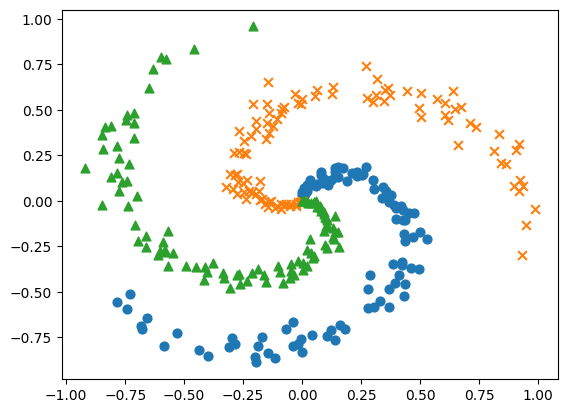

In [2]:
import os
import sys
print(os.getcwd())
current_dir = os.path.join(os.getcwd(), 'res')
sys.path.append(current_dir)
from dataset import spiral
import matplotlib.pyplot as plt

x, t =spiral.load_data()
print('x', x.shape) # (300, 2)
print('t', t.shape) # (300, 3)

# 绘制数据点
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [ ]:
import os
import sys
print(os.getcwd())
current_dir = os.path.join(os.getcwd(), 'res')
sys.path.append(current_dir)
from dataset import spiral

import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 初始化权重和偏置
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 生成层
        self.layers = [
            Affine(W1, b1)
            Sigmoid(),
            Affine(W2, b2)
        ]

        self.loss_layer = SoftmaxWithLoss()
        # 将所有权重和梯度整理到列表中
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

c:\Users\13218\Documents\GitHub\self-test-improvement\Deep_Learning\Natural_Language_Processing


In [ ]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I,H,O = input_size, hidden_size, output_size

        # 初始化权重、偏置
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 生成层
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        self.loss_layer = SoftmaxWithLoss()

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
        
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [ ]:
import os
import sys
print(os.getcwd())
current_dir = os.path.join(os.getcwd(), 'res')
sys.path.append(current_dir)
from dataset import spiral

import numpy as np
import matplotlib.pyplot as plt
from common.optimizer import SGD

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I,H,O = input_size, hidden_size, output_size

        # 初始化权重、偏置
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 生成层
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        self.loss_layer = SoftmaxWithLoss()

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
    # 前向传播
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    # loss计算
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    # 反向传播，Loss → Softmax → Affine2 → Sigmoid → Affine1
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学习用的变量
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 打乱数据
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 计算梯度更新参数
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期输出学习过程
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d | iter %d / %d | loss %.2f'
                  % (epoch + 1, iters +1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

c:\Users\13218\Documents\GitHub\self-test-improvement\Deep_Learning\Natural_Language_Processing
| epoch 1 | iter 10 / 10 | loss 1.13
| epoch 2 | iter 10 / 10 | loss 1.13
| epoch 3 | iter 10 / 10 | loss 1.12
| epoch 4 | iter 10 / 10 | loss 1.12
| epoch 5 | iter 10 / 10 | loss 1.11
| epoch 6 | iter 10 / 10 | loss 1.14
| epoch 7 | iter 10 / 10 | loss 1.16
| epoch 8 | iter 10 / 10 | loss 1.11
| epoch 9 | iter 10 / 10 | loss 1.12
| epoch 10 | iter 10 / 10 | loss 1.13
| epoch 11 | iter 10 / 10 | loss 1.12
| epoch 12 | iter 10 / 10 | loss 1.11
| epoch 13 | iter 10 / 10 | loss 1.09
| epoch 14 | iter 10 / 10 | loss 1.08
| epoch 15 | iter 10 / 10 | loss 1.04
| epoch 16 | iter 10 / 10 | loss 1.03
| epoch 17 | iter 10 / 10 | loss 0.96
| epoch 18 | iter 10 / 10 | loss 0.92
| epoch 19 | iter 10 / 10 | loss 0.92
| epoch 20 | iter 10 / 10 | loss 0.87
| epoch 21 | iter 10 / 10 | loss 0.85
| epoch 22 | iter 10 / 10 | loss 0.82
| epoch 23 | iter 10 / 10 | loss 0.79
| epoch 24 | iter 10 / 10 | loss 0.78
|